In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/data/cloth_data/HM_data.zip

Archive:  /content/gdrive/MyDrive/data/cloth_data/HM_data.zip
  inflating: HM_data/articles.csv    
  inflating: HM_data/customers.csv   
  inflating: HM_data/transactions_train.csv  


In [ ]:
pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 29.1 MB/s 
     |████████████████████████████████| 960 kB 63.0 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from datetime import datetime
path_1 = "/content/HM_data/articles.csv"
path_2 = "/content/HM_data/customers.csv"
path_3 = "/content/HM_data/transactions_train.csv"
articles = pd.read_csv(path_1 , encoding='latin-1')
pd.set_option('display.max_columns' , None)
articles.head(20)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
5,110065011,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,12,Light Beige,1,Dusty Light,11,Beige,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
6,111565001,111565,20 den 1p Stockings,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo..."
7,111565003,111565,20 den 1p Stockings,302,Socks,Socks & Tights,1010016,Solid,13,Beige,2,Medium Dusty,11,Beige,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo..."
8,111586001,111586,Shape Up 30 den 1p Tights,273,Leggings/Tights,Garment Lower body,1010016,Solid,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Tights with built-in support to lift the botto...
9,111593001,111593,Support 40 den 1p Tights,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny tights that shape the tummy, thighs..."


In [ ]:
customers = pd.read_csv(path_2 , encoding='latin-1' )
pd.set_option('display.max_columns' , None)
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [ ]:
transactions = pd.read_csv(path_3 ,encoding='latin-1' )
pd.set_option('display.max_columns' , None)
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [ ]:
print(articles.shape)
print(customers.shape)
print(transactions.shape)


(105542, 25)
(1371980, 7)
(31788324, 5)


There are 3 main tables:

articles - contains informations about each article .....like **product code**,

 **name**, 
 
 **product group code**, 
 
 **name** 




customers - contains informations about each customer......

**fidelity card membership**, 

**age**,

 **postal code**




transactions (train)
Transactions have

 **customer_id** and
 
  **article_id,** which are foreign keys for the customer and articles tables.
 Beside this, transaction also contains **sales_channel_id**.



Transaction train data has entries for the

 **date of the** **transaction**
 
  the **customer id**
  
  the **article id**,
  
  a **price**(per transaction) and 
   
  a **sales channel id.**

In [ ]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [ ]:
missing_data(articles)

,Total,Percent
detail_desc,416,0.394156
perceived_colour_master_name,0,0.000000
garment_group_name,0,0.000000
garment_group_no,0,0.000000
section_name,0,0.000000
section_no,0,0.000000
index_group_name,0,0.000000
index_group_no,0,0.000000
index_name,0,0.000000
index_code,0,0.000000


In [ ]:
temp = articles.groupby(["product_group_name"])["product_type_name"].nunique().sort_values(ascending = False)
temp

product_group_name
Accessories              38
Shoes                    16
Garment Upper body       15
Underwear                11
Swimwear                  6
Garment Full body         6
Garment and Shoe care     6
Bags                      6
Garment Lower body        5
Items                     5
Nightwear                 4
Socks & Tights            3
Interior textile          3
Cosmetic                  2
Underwear/nightwear       2
Furniture                 1
Stationery                1
Fun                       1
Unknown                   1
Name: product_type_name, dtype: int64

**ARTICLES DATA**

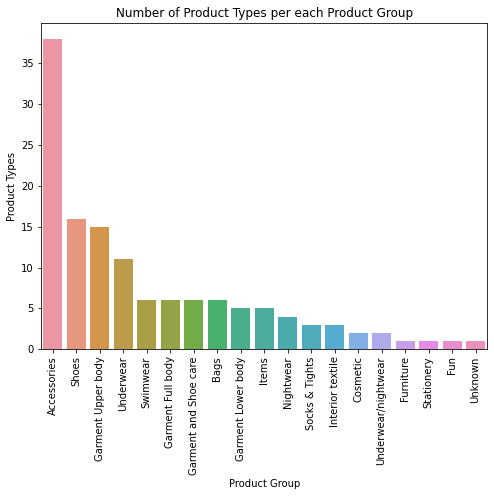

In [ ]:
temp = articles.groupby(["product_group_name"])["product_type_name"].nunique()

df = pd.DataFrame({'Product Group': temp.index,
                   'Product Types': temp.values
                  })
df = df.sort_values(['Product Types'], ascending=False)

plt.figure(figsize = (8,6))
plt.title('Number of Product Types per each Product Group')

sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Group', y="Product Types", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)

locs, labels = plt.xticks()
plt.show()

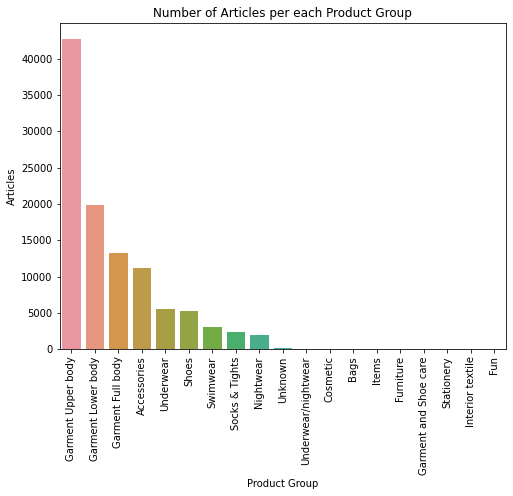

In [ ]:
temp = articles.groupby(["product_group_name"])["article_id"].nunique()

df = pd.DataFrame({'Product Group': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)

plt.figure(figsize = (8,6))
plt.title('Number of Articles per each Product Group')

sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Group', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

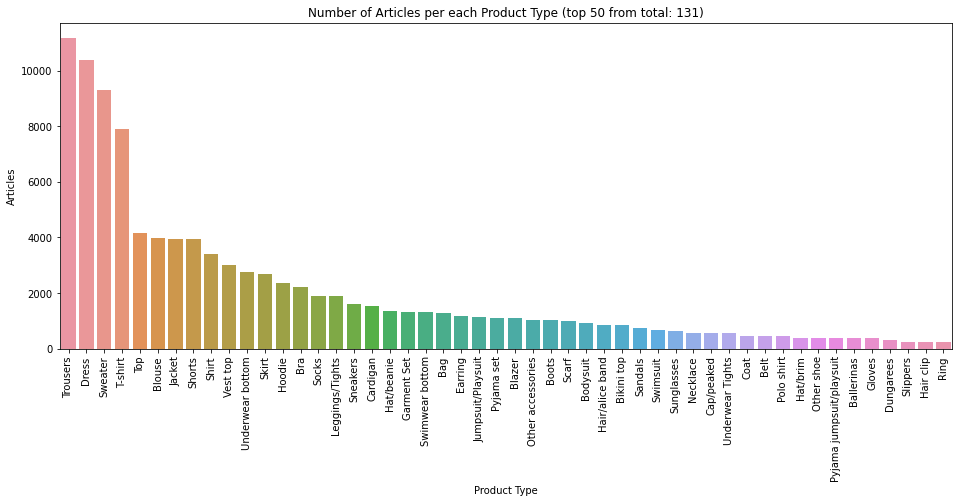

In [ ]:
temp = articles.groupby(["product_type_name"])["article_id"].nunique()

df = pd.DataFrame({'Product Type': temp.index,
                   'Articles': temp.values
                  })
total_types = len(df['Product Type'].unique())
df = df.sort_values(['Articles'], ascending=False)[0:50]

plt.figure(figsize = (16,6))
plt.title(f'Number of Articles per each Product Type (top 50 from total: {total_types})')

sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Type', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

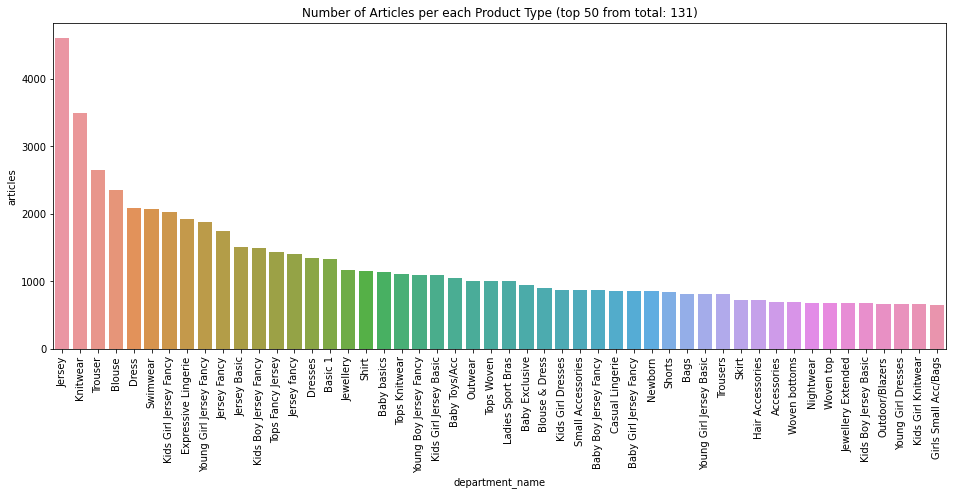

In [ ]:
temp = articles.groupby(['department_name'])['article_id'].nunique().sort_values(ascending = False)
df = pd.DataFrame({'department_name' : temp.index,
                   'articles' : temp.values
                  })
total_depts = len(df['department_name'].unique())
df = df.head(50)

plt.figure(figsize = (16,6))
plt.title(f'Number of Articles per each Product Type (top 50 from total: {total_types})')

sns.set_color_codes("pastel")
s = sns.barplot(x = 'department_name', y="articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()


**TRANSACTIONS ANALYSIS**

---



In the following we will focus in the analysis of the transaction dataframe, in order to discover the most and least sold products.

First, we extract the *quantities sold per article* using the value counts method on the **article_id** column of the transaction dataframe.

In [ ]:
df_sold_qty = transactions["article_id"].value_counts()
df_sold_qty

706016001    50287
706016002    35043
372860001    31718
610776002    30199
759871002    26329
             ...  
520736002        1
619777003        1
586904003        1
512385003        1
533261032        1
Name: article_id, Length: 104547, dtype: int64

In [ ]:
df_sold_qty= df_sold_qty.reset_index()
df_sold_qty.rename(columns = {"article_id":"sold_qty" , "index":"article_id"}, inplace=True)
df_sold_qty.head()

,article_id,sold_qty
0,706016001,50287
1,706016002,35043
2,372860001,31718
3,610776002,30199
4,759871002,26329


In [ ]:
df_sold_qty["sold_qty"].describe()

count    104547.000000
mean        304.057735
std         791.266060
min           1.000000
25%          14.000000
50%          65.000000
75%         286.000000
max       50287.000000
Name: sold_qty, dtype: float64

Summary statistics on the sold quantities:



there are 105000 different articles in the transactions.


There are items which have been sold only once


25% of sold products, have been sold 14 or less times


50% were sold 65 or less times


75% were sold 286 or less times


The most sold item have been sold 50287 times.




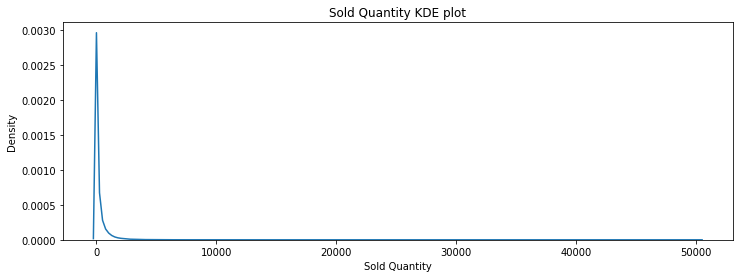

In [ ]:
plt.figure(figsize=(12,4))
plt.title("Sold Quantity KDE plot")
sns.kdeplot(df_sold_qty["sold_qty"])
plt.xlabel("Sold Quantity")
plt.show()

the distribution is **heavily right skewed**.

In [ ]:
df_sold_qty["sold_qty"].quantile([0.90,0.95,0.99,0.999])

0.900     793.000
0.950    1318.000
0.990    3185.080
0.999    9282.534
Name: sold_qty, dtype: float64

The quantile analysis can give us the following insights:

90% of the articles........ have been sold 793 or less times


95% of the articles......... have been sold 1318 or less times


99% of the articles ..........have been sold 3185 or less times


This shows that ......**there is a very small minority of items ......that sold more than 10k times (just the 0.001%).............. highlighting the skewness nature of the distribution.**

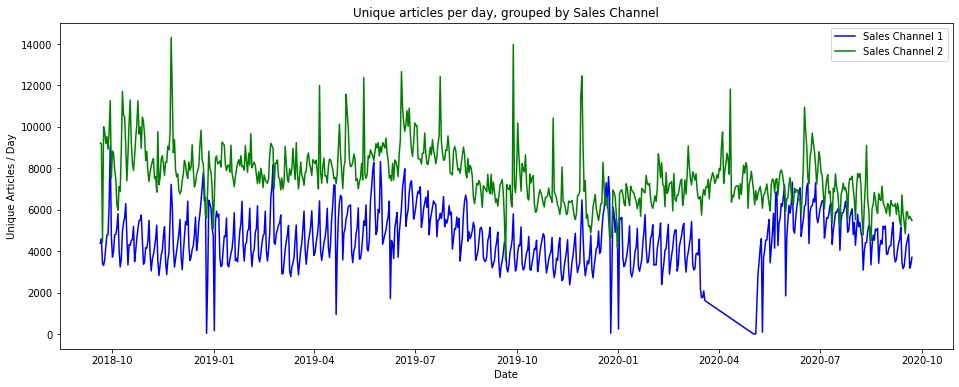

In [ ]:
  df = transactions.groupby(["t_dat", "sales_channel_id"])["article_id"].nunique().reset_index()

df["t_dat"]  =  df["t_dat"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

df.columns = ["Date", "Sales Channel Id", "Unique Articles"]

fig, ax = plt.subplots(1, 1, figsize=(16,6))
g1 = ax.plot(df.loc[df["Sales Channel Id"]==1, "Date"], df.loc[df["Sales Channel Id"]==1, "Unique Articles"], label="Sales Channel 1", color="Blue")
g2 = ax.plot(df.loc[df["Sales Channel Id"]==2, "Date"], df.loc[df["Sales Channel Id"]==2, "Unique Articles"], label="Sales Channel 2", color="Green")
plt.xlabel("Date")
plt.ylabel("Unique Articles / Day")
ax.legend()
plt.title(f"Unique articles per day, grouped by Sales Channel")
plt.show()

**Q1 - Which are the TOP 100 articles in terms of sold quantity?**


---



We can simply extract the most 100 sold items from the dataframe "df_sold_qty" by taking the first 100 rows.

In [ ]:
top_100_sold = df_sold_qty.iloc[:100]
top_100_sold.head()

,article_id,sold_qty
0,706016001,50287
1,706016002,35043
2,372860001,31718
3,610776002,30199
4,759871002,26329


Then we join this dataframe with the **articles dataframe (articles)** by the "article_id" column in order to get more details about each article.

In [ ]:
articles_column = articles[['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'colour_group_name', 'index_name']]
transactions_column = transactions[["customer_id", "article_id", "price"]]

The "articles" dataframe has **25 columns** and **more than 100k rows**.


For our our analysis we will just select the following columns:

article_id


prod_name


product_type_name


product_group_name


colour_group_name


index_name


By considering only these columns we can also save lots of memory.





The Transactions dataframe has **more than 31 million rows**.

 In order to save memory............ we decide to drop some columns....... and keep only 
 
 customer_id
 
 article_id
 
 price.

In [ ]:
top_100_details = pd.merge(articles_column, top_100_sold, how='inner', on = 'article_id')
top_100_details.head()

,article_id,prod_name,product_type_name,product_group_name,colour_group_name,index_name,sold_qty
0,108775015,Strap top,Vest top,Garment Upper body,Black,Ladieswear,10841
1,111586001,Shape Up 30 den 1p Tights,Leggings/Tights,Garment Lower body,Black,Lingeries/Tights,14191
2,111593001,Support 40 den 1p Tights,Underwear Tights,Socks & Tights,Black,Lingeries/Tights,13888
3,156231001,Box 4p Tights,Underwear Tights,Socks & Tights,Black,Lingeries/Tights,21013
4,158340001,Highwaist 30 den 1p Tights,Leggings/Tights,Garment Lower body,Black,Lingeries/Tights,16533


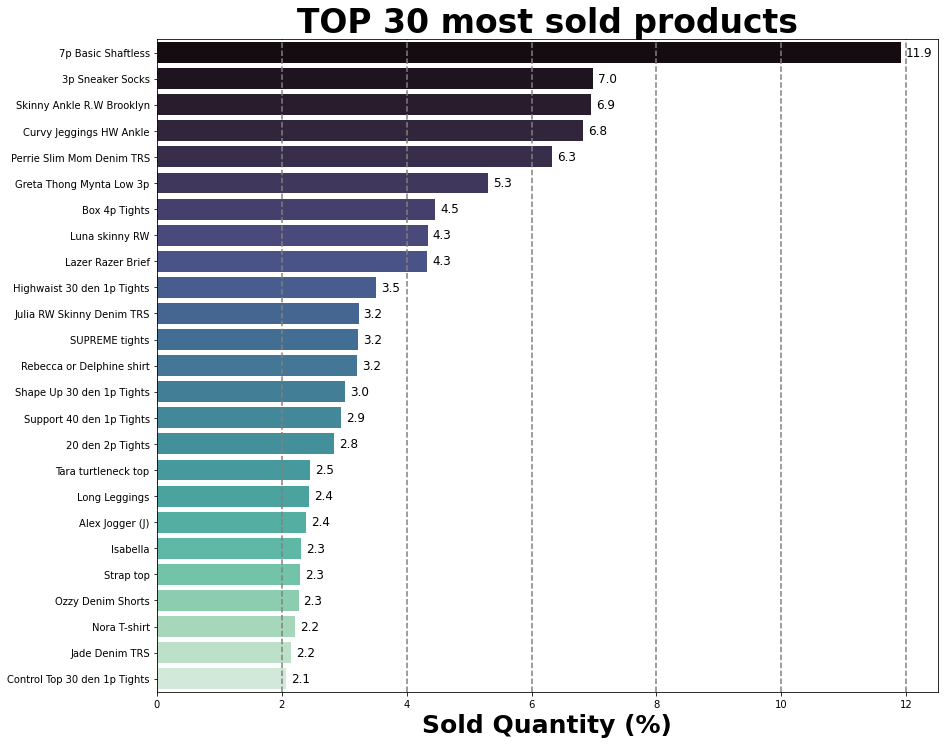

In [ ]:
plt.figure(figsize=(14,12))
plt.title("TOP 30 most sold products", fontsize=33, fontweight="bold")
no=30
g = sns.barplot( y="prod_name" ,  x="sold_qty(%)",  data = top_100_details.iloc[:no].groupby("prod_name")["sold_qty"].sum().transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False),  palette="mako", ci=False)

for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=12)

plt.xlabel("Sold Quantity (%)", size=25, fontweight="bold")
plt.ylabel("")
plt.grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)
plt.show()

The trousers "7p Basic Shaftless " is responsible for almost 11% of all sold products.


the TOP 4 of most sold items, is responsible for almost 40% of the TOP 100 sold products.

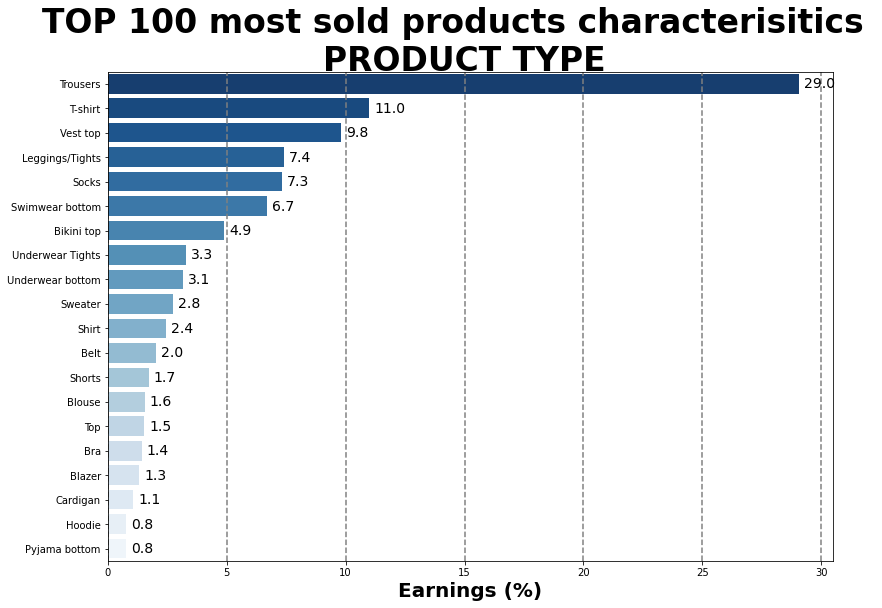

In [ ]:
fig, ax = plt.subplots(figsize=(13,9))
plt.suptitle("TOP 100 most sold products characterisitics \n  PRODUCT TYPE ", fontsize=33, fontweight="bold")
no=100

g = sns.barplot(y="product_type_name", x="sold_qty(%)", data=top_100_details.iloc[:no].groupby("product_type_name")["sold_qty"].sum().transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), palette="Blues_r", ci=False)

for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=14, color="black")
    plt.ylabel("")
    plt.xlabel("Earnings (%)", size=20,fontweight="bold")
    plt.grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)
    plt.show()

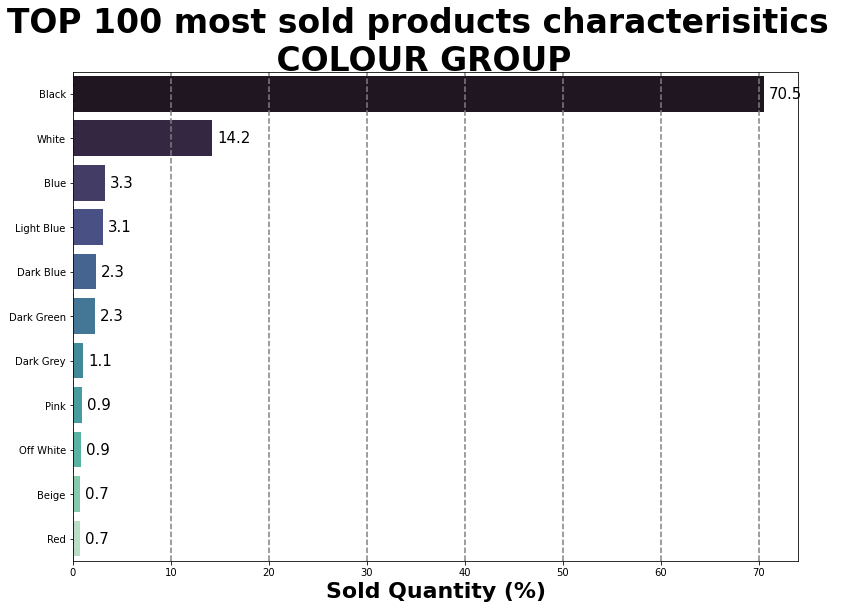

In [ ]:
fig, ax = plt.subplots(figsize=(13,9))
plt.suptitle("TOP 100 most sold products characterisitics \n COLOUR GROUP ", fontsize=33, fontweight="bold")
no=100

g = sns.barplot(y="colour_group_name", x="sold_qty(%)", data=top_100_details.iloc[:no].groupby("colour_group_name")["sold_qty"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            palette="mako", ci=False)

for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=15, color="black")
plt.ylabel("")
plt.xlabel("Sold Quantity (%)", size=22, fontweight="bold")
plt.grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)


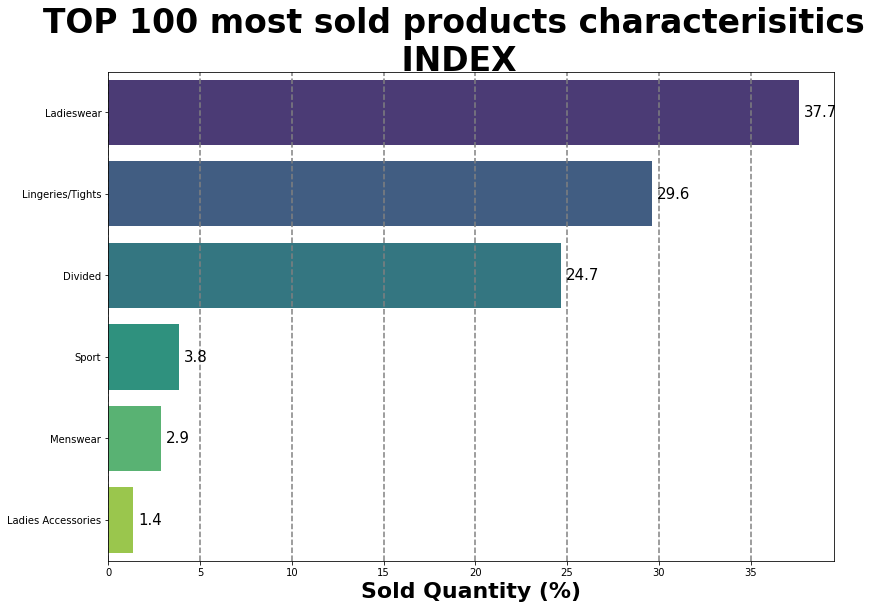

In [ ]:
fig, ax = plt.subplots(figsize=(13,9))
plt.suptitle("TOP 100 most sold products characterisitics \n INDEX ", fontsize=33, fontweight="bold")
no=100

g = sns.barplot(y="index_name", x="sold_qty(%)", data=top_100_details.iloc[:no].groupby("index_name")["sold_qty"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
              palette="viridis", ci=False)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=15, color="black")
plt.ylabel("")
plt.xlabel("Sold Quantity (%)", size=22, fontweight="bold")
plt.grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)



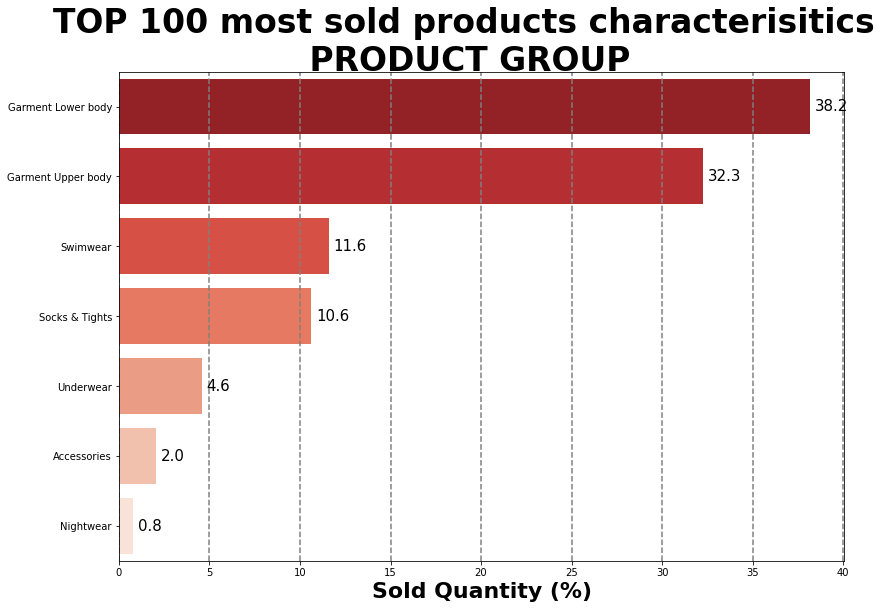

In [ ]:
fig, ax = plt.subplots(figsize=(13,9))
plt.suptitle("TOP 100 most sold products characterisitics \n PRODUCT GROUP ", fontsize=33, fontweight="bold")
no=100

g = sns.barplot(y="product_group_name", x="sold_qty(%)", data=top_100_details.iloc[:no].groupby("product_group_name")["sold_qty"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            palette="Reds_r", ci=False)

for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=15, color="black")
plt.ylabel("")
plt.xlabel("Sold Quantity (%)", size=22, fontweight="bold")
plt.grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)
plt.show()


**Q2 - Which are the TOP 100 articles that generated most earnings for the company?**¶

---



The earnings can be calculated.......... by multiplying the price of each product........ by its total sold quanity.

We will now create a new dataframe **df_prices** which will include .......the earnings generated by each product.

In [ ]:
df_prices = transactions[["price","article_id"]].groupby("article_id").sum().sort_values(by="price", ascending=False)
df_prices

,price
article_id,
706016001,1631.732102
706016002,1136.321085
568601006,939.268593
448509014,781.478390
706016003,692.195915
...,...
407663007,0.000678
520431003,0.000678
405310006,0.000475


In [ ]:
df_prices.rename(columns={"price":"earning"}, inplace=True)
df_prices = df_prices.reset_index()
df_prices.head()

,article_id,earning
0,706016001,1631.732102
1,706016002,1136.321085
2,568601006,939.268593
3,448509014,781.478390
4,706016003,692.195915


We can see that .....the most earnings generated by a product is 1631.

(*NOTE: For privacy reasons, the prices have been transformed/scaled by the creator of the dataset, and so do not represent any known currency.*)


How much is the total earnings?

In [ ]:
print("Number of different sold articles:", len(df_prices["earning"]))

print("Total Earnings:", df_prices["earning"].sum())

Number of different sold articles: 104547
Total Earnings: 884645.974050846


**Q3 - Which are articles that generated lower earnings for the company?**

---



In [ ]:
worst_100_prices = df_prices.iloc[-100:]
worst_100_prices.head()


,article_id,earning
104447,555293002,0.002136
104448,502262002,0.002119
104449,585716001,0.002034
104450,807241091,0.001864
104451,551413003,0.001695


In [ ]:
worst_100_price_details = pd.merge(worst_100_prices, articles_column , how='inner', on = 'article_id')

worst_100_price_details.head()

,article_id,earning,prod_name,product_type_name,product_group_name,colour_group_name,index_name
0,555293002,0.002136,Elin thin hair elastic,Hair string,Accessories,Light Pink,Divided
1,502262002,0.002119,Kelly mittens,Gloves,Accessories,Light Grey,Baby Sizes 50-98
2,585716001,0.002034,Festival dress,Dress,Garment Full body,Light Orange,Children Sizes 134-170
3,807241091,0.001864,1p Fun Socks,Socks,Socks & Tights,Light Grey,Lingeries/Tights
4,551413003,0.001695,DANTE set,Garment Set,Garment Full body,Light Blue,Baby Sizes 50-98


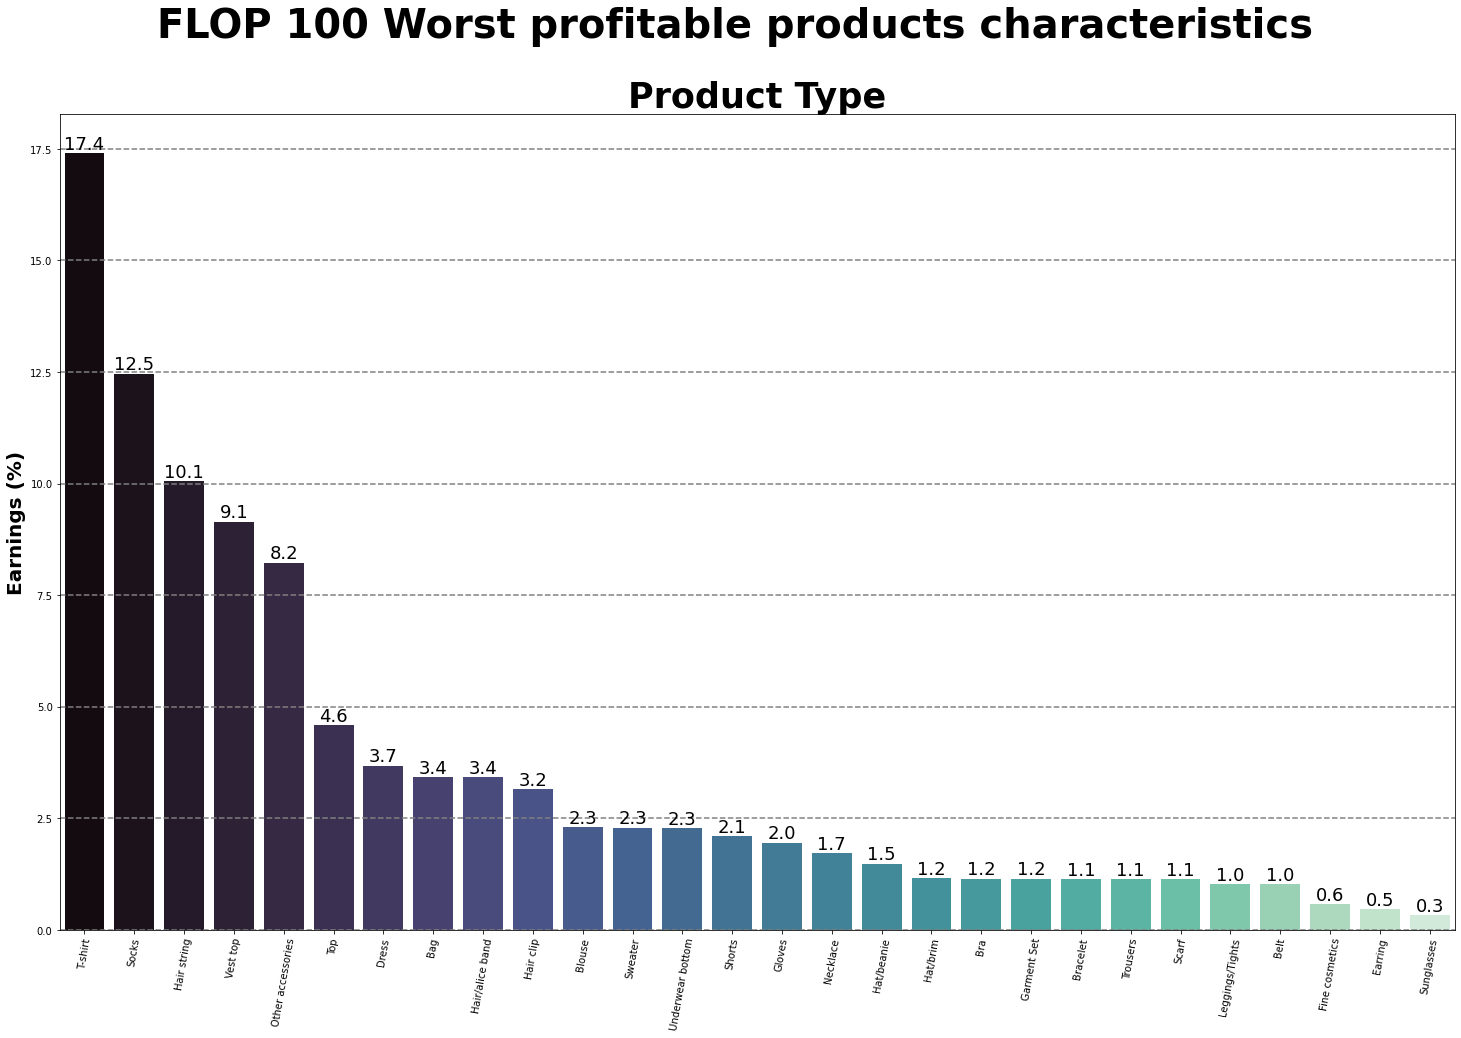

In [ ]:
fig, ax = plt.subplots(figsize=(25,15))
plt.suptitle("FLOP 100 Worst profitable products characteristics", fontsize=40 ,fontweight="bold")

no=100

g = sns.barplot(x="product_type_name", y="earning(%)", data=worst_100_price_details.iloc[:no].groupby("product_type_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            palette="mako", ci=False)

for container in g.containers:
    g.bar_label(container, fmt='%.1f', fontsize=18)

ax.grid(axis="y",color = 'grey', linestyle = '--', linewidth = 1.5)
ax.set_xlabel("")
ax.set_ylabel("Earnings (%)", size=20,fontweight="bold")
ax.set_xticklabels(g.get_xticklabels(), rotation=80)
ax.set_title("Product Type", size=35,fontweight="bold")
plt.show()

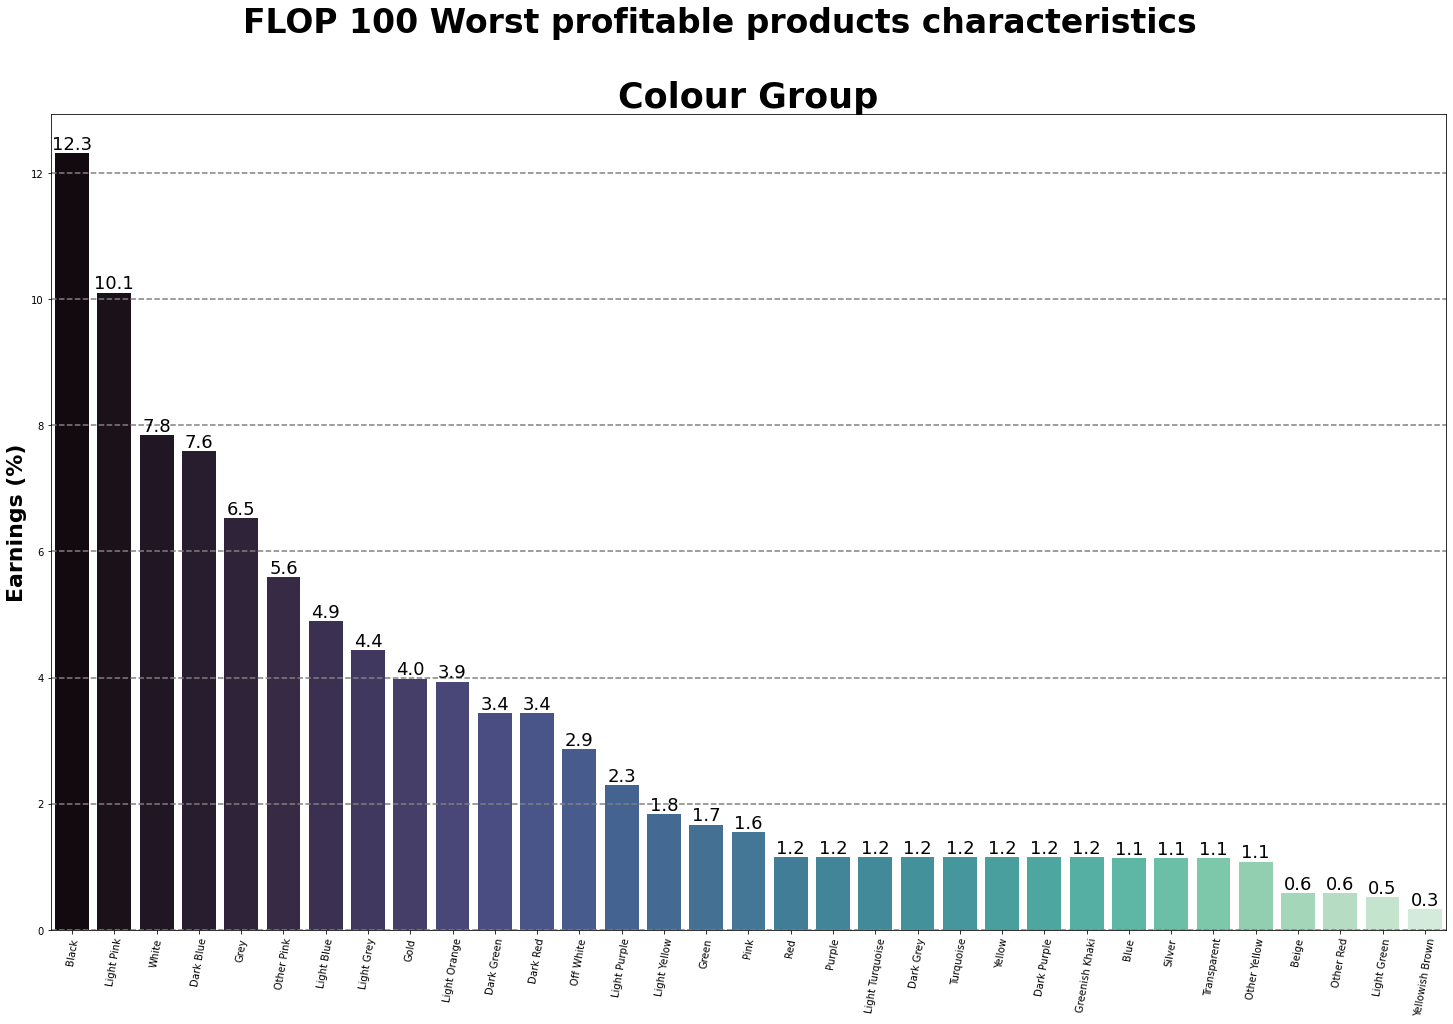

In [ ]:
fig, ax = plt.subplots(figsize=(25 , 15))
plt.suptitle("FLOP 100 Worst profitable products characteristics ", fontsize=33, fontweight="bold")

no=100

g = sns.barplot(x="colour_group_name", y="earning(%)", data=worst_100_price_details.iloc[:no].groupby("colour_group_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            palette="mako", ci=False)

for container in g.containers:
    g.bar_label(container, fmt='%.1f', fontsize=18)

ax.grid(axis="y",color = 'grey', linestyle = '--', linewidth = 1.5)
ax.set_xlabel("")
ax.set_ylabel("Earnings (%)", size=22,fontweight="bold")
ax.set_xticklabels(g.get_xticklabels(), rotation=80)
ax.set_title("Colour Group", size=35,fontweight="bold")
 
plt.show()


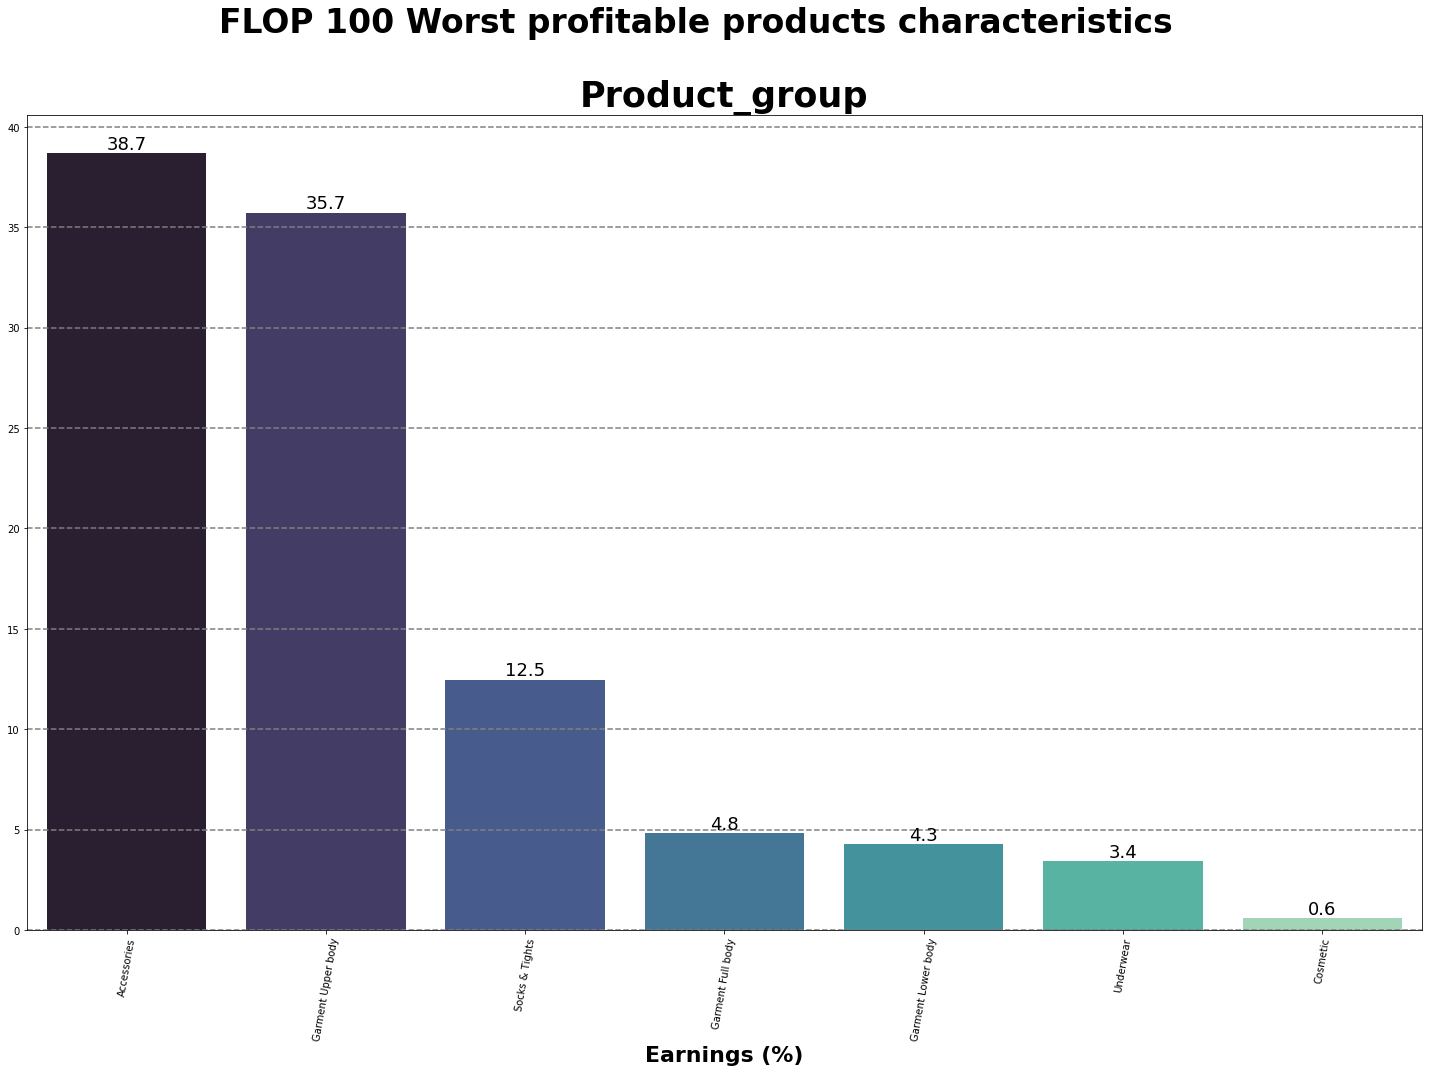

In [ ]:


fig, ax = plt.subplots(figsize=(25 , 15))
plt.suptitle("FLOP 100 Worst profitable products characteristics ", fontsize=33, fontweight="bold")

no=100

g = sns.barplot(x="product_group_name", y="earning(%)", data=worst_100_price_details.iloc[:no].groupby("product_group_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            palette="mako", ci=False)

for container in g.containers:
    g.bar_label(container, fmt='%.1f', fontsize=18)

ax.grid(axis="y",color = 'grey', linestyle = '--', linewidth = 1.5)
ax.set_ylabel("")
ax.set_xlabel("Earnings (%)", size=22,fontweight="bold")
ax.set_xticklabels(g.get_xticklabels(), rotation=80)
ax.set_title("Product_group", size=35,fontweight="bold")
 
plt.show()



38.7% of these only sonce once products are accessories

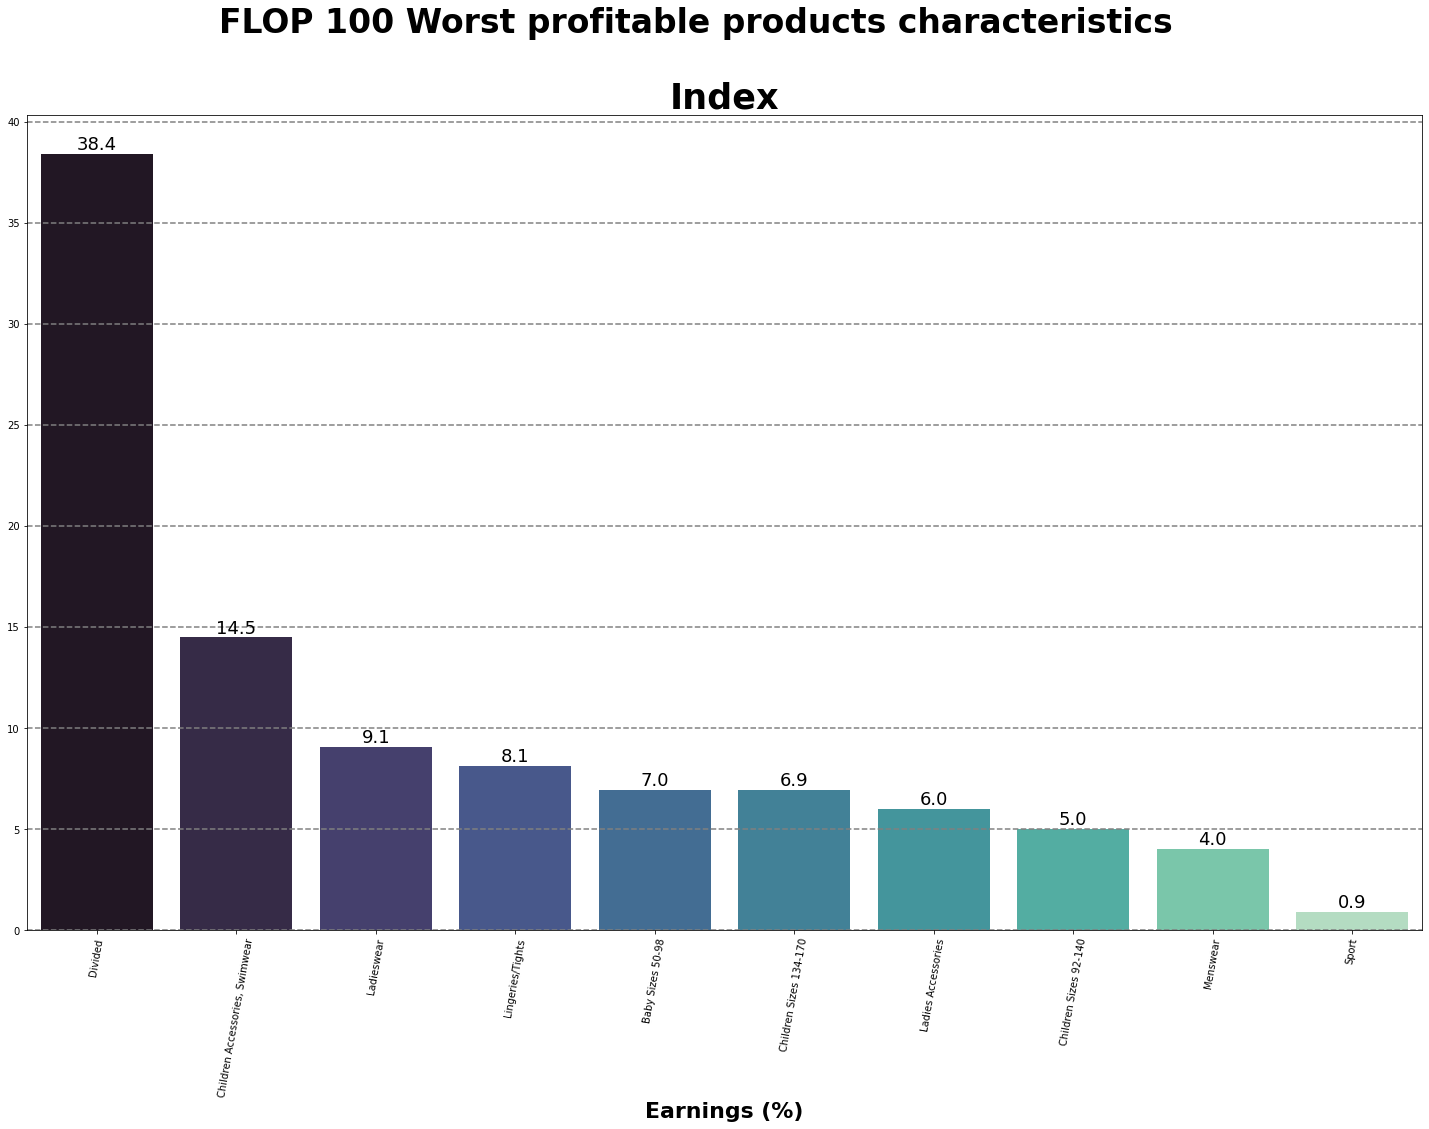

In [ ]:
fig, ax = plt.subplots(figsize=(25 , 15))
plt.suptitle("FLOP 100 Worst profitable products characteristics ", fontsize=33, fontweight="bold")

no=100

g = sns.barplot(x="index_name", y="earning(%)", data=worst_100_price_details.iloc[:no].groupby("index_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            palette="mako", ci=False)

for container in g.containers:
    g.bar_label(container, fmt='%.1f', fontsize=18)

ax.grid(axis="y",color = 'grey', linestyle = '--', linewidth = 1.5)
ax.set_ylabel("")
ax.set_xlabel("Earnings (%)", size=22,fontweight="bold")
ax.set_xticklabels(g.get_xticklabels(), rotation=80)
ax.set_title("Index", size=35,fontweight="bold")
 
plt.show()


Around 35% of these products are for children of babies

**Customer Analayis**

---



In the following....... we will start an analysis on the customers to find interesting insights and understand ........which customers are responsible for most purchases.

In [ ]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In order to perform the analysis....... we first decide to create a new dataframe..... that will include, for each row, 

 1. an unique customer_id

 2. the total purchased quantity by that customer and 
 
 3.  the earnings generated by the company by the purchases of that customer.

First, we crate a dataframe ....which will include the **unique customer ids** and the **earnings generated by theirs purchases**.

In [ ]:
df_cust_prices = transactions[["customer_id", "price"]].groupby("customer_id").sum()
df_cust_prices.head()

,price
customer_id,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,0.648983
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,2.601932
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0.704780
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,0.060983
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,0.469695


Second..... we create a dataframe.... that will include the **unique customer ids** and their **total purchased quantity of products**.

In [ ]:
df_cust_qty = transactions[["customer_id", "article_id"]].groupby("customer_id").count()
df_cust_qty.head()

,article_id
customer_id,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,21
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,86
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,18
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,2
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,13


Then..... we join these two dataframe to a new one **"cust_qty_price"**........ which will include..... 

the **unique customer ids** ,

 **their purchased quantity** and 
 
 the **earnings generated by the company by their purchases**.

In [ ]:
cust_qty_price = pd.merge(df_cust_prices, df_cust_qty, on='customer_id', how='inner')
cust_qty_price.head()

,price,article_id
customer_id,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,0.648983,21
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,2.601932,86
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0.704780,18
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,0.060983,2
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,0.469695,13


Finally ......we can join this new dataframe to the Customer dataframe *customers*.......... so that we can add some informations about the customers.......... on the newly defined cust_qty_price dataframe.

In [ ]:
cust_details = pd.merge(cust_qty_price, customers.drop("postal_code", axis=1) , on='customer_id', how='inner')
cust_details.head()

,customer_id,price,article_id,FN,Active,club_member_status,fashion_news_frequency,age
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.648983,21,NaN,NaN,ACTIVE,NONE,49.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,2.601932,86,NaN,NaN,ACTIVE,NONE,25.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.704780,18,NaN,NaN,ACTIVE,NONE,24.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.060983,2,NaN,NaN,ACTIVE,NONE,54.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0.469695,13,1.0,1.0,ACTIVE,Regularly,52.0


In [ ]:
#Total no.of customers
print(f"In total there are {len(cust_details)} different customers")

In total there are 1362281 different customers


Purchased Quantity by Customer Analysis

In [ ]:
cust_details.article_id.describe()

count    1.362281e+06
mean     2.333463e+01
std      3.924225e+01
min      1.000000e+00
25%      3.000000e+00
50%      9.000000e+00
75%      2.700000e+01
max      1.895000e+03
Name: article_id, dtype: float64

The minimum purchased quantity by a single customer is 1


25% of customers purchased 3 or less items


50% of customers Purchased 9 or less items


75% of customers Purchased 27 or less items


The maximum purchased quantity by a single customer is 1895 products

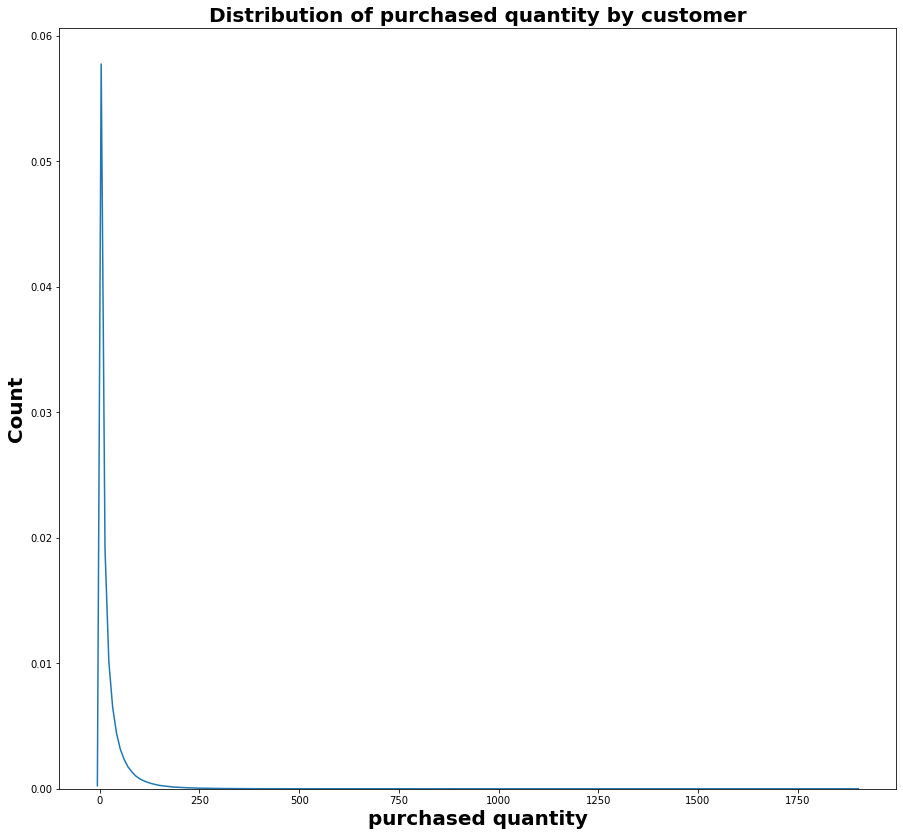

In [ ]:
plt.figure(figsize=(15,14))

plt.title("Distribution of purchased quantity by customer", fontweight="bold", size=20)

sns.kdeplot(cust_details["article_id"])

plt.xlabel("purchased quantity",fontweight="bold", size=20)

plt.ylabel("Count",fontweight="bold", size=20)

plt.show()

The distribution of this variable is highly skewed.

We will analyze the age .....and other provided features of the customer..... to better find insights on the customers and their purchase behaviour.

Purchase Behaviors according to Age

---



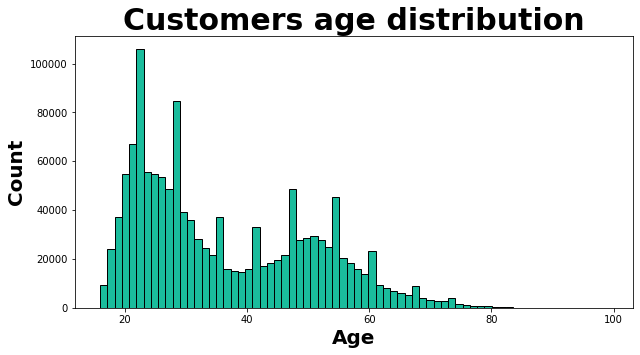

In [ ]:
plt.figure(figsize=(10,5))

plt.title("Customers age distribution", fontweight="bold", size=30)

plt.hist(cust_details["age"] ,  bins=70, edgecolor="black", color="#1ABC9C")

plt.xlabel("Age",fontweight="bold", size=20)

plt.ylabel("Count",fontweight="bold", size=20)

plt.show()

The distribution of the age feature is **bivariate**.

 In order to create more effective plots....... we will create a categorical column for age ......which divides the ages in age groups.

**Q4 - Which age group purchase more articles?**

---



In [ ]:
cust_details['age_groups'] = pd.cut(cust_details['age'], bins=[16, 20, 30, 40,50, 60, 70, float('Inf')] , labels=['16-20', '20-30','30-40','40-50','50-60','60-70' , '70+'])
cust_details.head()

,customer_id,price,article_id,FN,Active,club_member_status,fashion_news_frequency,age,age_groups
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.648983,21,NaN,NaN,ACTIVE,NONE,49.0,40-50
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,2.601932,86,NaN,NaN,ACTIVE,NONE,25.0,20-30
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.704780,18,NaN,NaN,ACTIVE,NONE,24.0,20-30
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.060983,2,NaN,NaN,ACTIVE,NONE,54.0,50-60
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0.469695,13,1.0,1.0,ACTIVE,Regularly,52.0,50-60


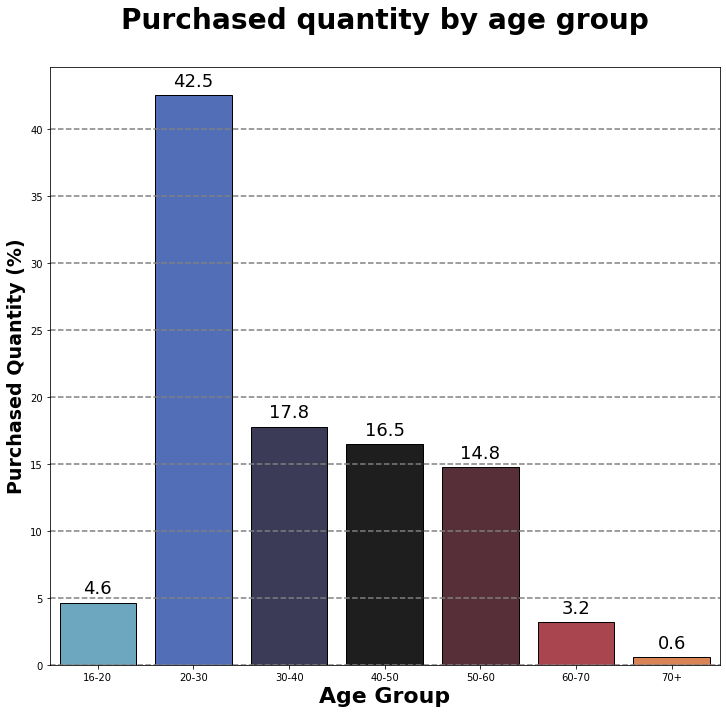

In [ ]:
plt.figure(figsize=(12,11))

plt.title("Purchased quantity by age group\n", fontweight="bold", size=28)

g = sns.barplot(x="age_groups", y="Purchased Quantity(%)", data=cust_details.groupby("age_groups")["article_id"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('Purchased Quantity(%)').reset_index(), palette="icefire", edgecolor="black")

plt.xlabel("Age Group",fontweight="bold", size=22)

plt.ylabel("Purchased Quantity (%)",fontweight="bold", size=19)

for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=18, color="black")

plt.grid(axis="y",color = 'grey', linestyle = '--', linewidth = 1.5)

plt.show()

Insights:

Customers in the range 20-30 are responsible for more than 42% of the total purchased products.


Customers in the range 16-20 , 60-70 and 70+ are responsible for the 8% of the total purchased products


Customers in the range 30-40, 40-50 and 50-60 are responsible for 16% of purchased quantity each.

**Q5 - Which age group generates more earnings for the company?**

---



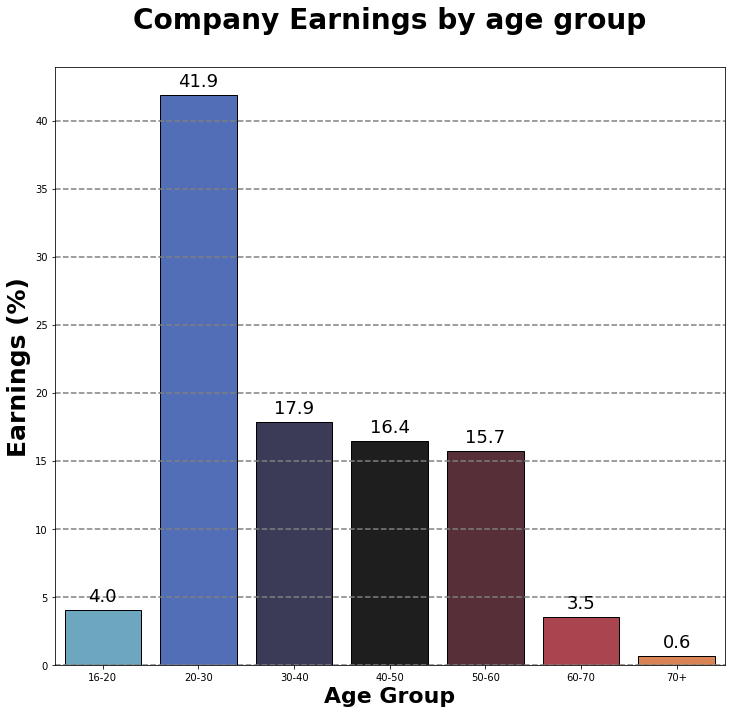

In [ ]:
plt.figure(figsize=(12,11))

plt.title("Company Earnings by age group\n", fontweight="bold", size=28)

g = sns.barplot(x="age_groups", y="earning(%)", data=cust_details.groupby("age_groups")["price"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index(), palette="icefire",edgecolor="black")

plt.xlabel("Age Group",fontweight="bold", size=22)

plt.ylabel("Earnings (%)",fontweight="bold", size=25)

for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=18, color="black")

plt.grid(axis="y",color = 'grey', linestyle = '--', linewidth = 1.5)

plt.show()

Indeed .........a very similar situation to the purchases quantity .....can be found in the earnings analysis..... since customers who buys more, on average leads to higher earnings for the company.


The age group 20-30 is by far responsible for the highest earnings for the company (41.9% of total earnings).

Does the club member status influence the purchased quantity?

In [ ]:
cust_details["club_member_status"].value_counts(normalize=True)

ACTIVE        0.931395
PRE-CREATE    0.068261
LEFT CLUB     0.000344
Name: club_member_status, dtype: float64

We can see that:

More than 93% of the customers belong to the ACTIVE category


6.8% of the customers belong to the PRE-CREATE cateory


0.3% of the customers belong to the LEFT CLUB category


This shows a very high imbalance among the classes:
 If we consider the **sum of purchased products per each category**, this will likely show that....... the most part of Purchased products belongs to the ACTIVE members.

In [ ]:
cust_details.groupby("club_member_status")["article_id"].sum()

club_member_status
ACTIVE        31057401
LEFT CLUB         8539
PRE-CREATE      660219
Name: article_id, dtype: int64

Indeed, more customers in a group leads to higher purchases.

For this reason, it is more wise to consider a mean Purchased quantity instead of a sum:

In [ ]:
print("The average quantity of purchased products by the customers is {:.0f} products " .format(cust_details["article_id"].mean()))

The average quantity of purchased products by the customers is 23 products 


In [ ]:
#cust_details.groupby("club_member_status")["article_id"].mean()

print("The average quantity of purchased products by the ACTIVE customers is {:.0f} products ".format(cust_details.groupby("club_member_status")["article_id"].mean()["ACTIVE"]))
print("The average quantity of purchased products by the LEFT-CLUB customers is {:.0f} products ".format(cust_details.groupby("club_member_status")["article_id"].mean()["LEFT CLUB"]))
print("The average quantity of purchased products by the PRE-CREATE customers is {:.0f} products ".format(cust_details.groupby("club_member_status")["article_id"].mean()["PRE-CREATE"]))


The average quantity of purchased products by the ACTIVE customers is 25 products 
The average quantity of purchased products by the LEFT-CLUB customers is 18 products 
The average quantity of purchased products by the PRE-CREATE customers is 7 products 


By considering the mean, we can see a very different situation, which will be shown as percentages in the following plot:

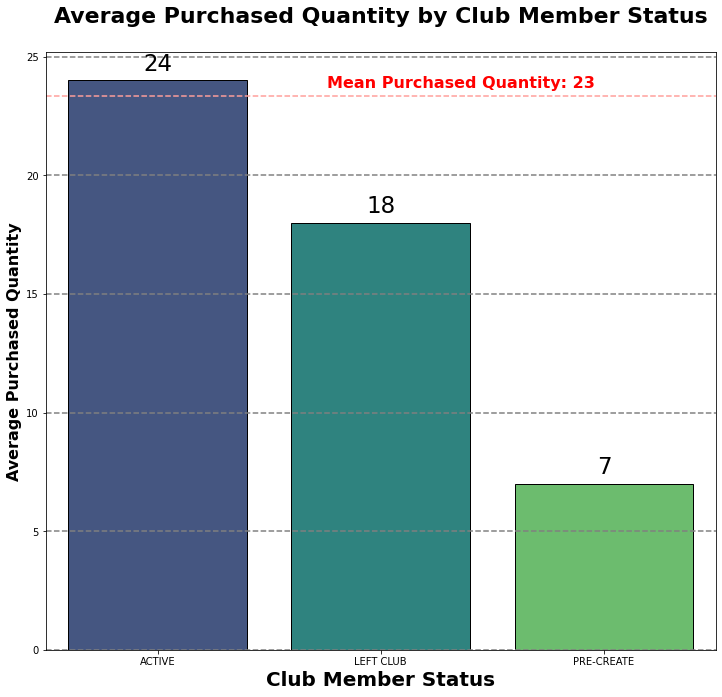

In [ ]:
plt.figure(figsize=(12,11))

plt.title("Average Purchased Quantity by Club Member Status\n", fontweight="bold", size=22)

g = sns.barplot(x="club_member_status", y="article_id", data=cust_details.groupby("club_member_status")["article_id"].mean() \
                .astype(int).reset_index(), palette="viridis", edgecolor="black")

plt.axhline(y = cust_details["article_id"].mean(), color = 'r', linestyle = '--')

plt.text(0.76, 23.7, 'Mean Purchased Quantity: {:.0f}'.format(cust_details["article_id"].mean()), size=16, color="red",fontweight="bold")

plt.xlabel("Club Member Status",fontweight="bold", size=20)

plt.ylabel("Average Purchased Quantity",fontweight="bold", size=16)

for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.0f', fontsize=23, color="black")

plt.grid(axis="y",color = 'grey', linestyle = '--', linewidth = 1.5)

plt.show()

This plots shows that ......the **average purchased quantity** ....differs a lot among the categories.

In particular, customers belonging to the ACTIVE clubs, purchase more products than other categories...... while those in the PRE CREATE category purchases on average.... less than a third of active customers.

Finally, since the distribution of the purchased quantity is **heavily right skewed**, it could be interesting to check out.... the median purhcased quantity.

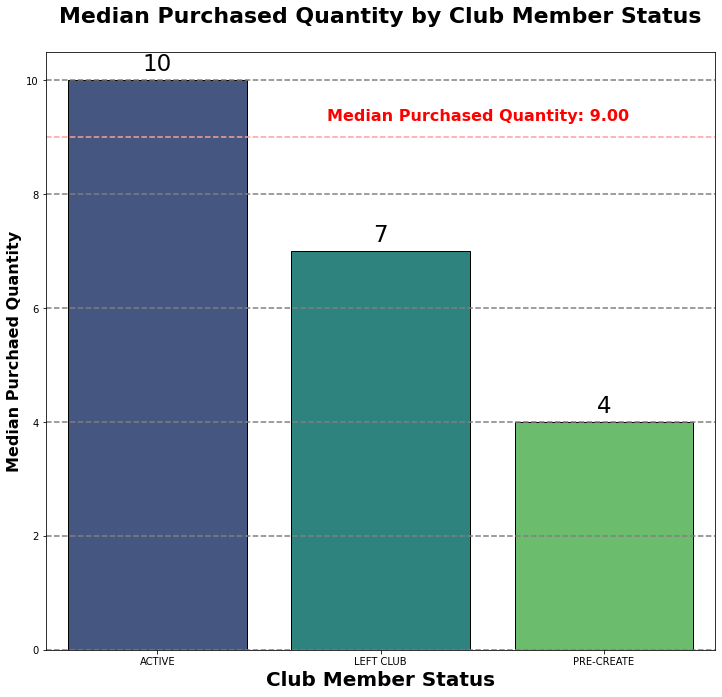

In [ ]:
plt.figure(figsize=(12,11))

plt.title("Median Purchased Quantity by Club Member Status\n", fontweight="bold", size=22)

g = sns.barplot(x="club_member_status", y="article_id", data=cust_details.groupby("club_member_status")["article_id"].median() \
                .reset_index(), palette="viridis", edgecolor="black")

plt.axhline(y = cust_details["article_id"].median(), color = 'r', linestyle = '--')

plt.text(0.76, 9.3, 'Median Purchased Quantity: {:.2f}'.format(cust_details["article_id"].median()), size=16, color="red",fontweight="bold")

plt.xlabel("Club Member Status",fontweight="bold", size=20)

plt.ylabel("Median Purchaed Quantity",fontweight="bold", size=16)

for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.0f', fontsize=23, color="black")

plt.grid(axis="y",color = 'grey', linestyle = '--', linewidth = 1.5)

plt.show()

Indeed......even if the Median is quite different from the Mean due to **high skeweness of the data**, a very similar situation to the mean purchases quantity can be observed, where ACTIVE customers buys more product on average.